*Importing Basic Libraries*** 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [46]:
print(tf.__version__)

2.9.2


In [47]:
df = pd.read_csv('//content//Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
## Divide the dataset into independent and dependent features

X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [49]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [50]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [51]:
### Feature Engineering


**One Hot Encoding**

In [52]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [53]:
### concate these variable with the dataframe

X = X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [54]:
X = pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [55]:
### Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [56]:
### For which algorithms Feature Scaling is required
### For ANN it is required
### For Linear Regression it is required
### For Decision Tree not required
### For Random Forest Not Required
### For XG Boost not required
### KNN it is required
### For Kmeans it is required

### Wherever Distance,gradient descent required scaling is done.

In [57]:
## Feature ScalIng

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [58]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [59]:
X_train.shape,y_train.shape

((8000, 11), (8000,))

In [60]:
X_test.shape,y_test.shape

((2000, 11), (2000,))

***Tensorflow***
***After 2.0 version of Tensorflow ---- Keras and Tensorflow got integrated*** 

**Creating Aritifical_Neural_Network**

# Sequential : When we take entire input features at once as a block it is said as sequential...It indicates that it will be able to do Forward and Backword propagation

# Dense : It means we will be able to create neurons in the hidden layer, create input and output laer

# Activation : Whatever activation we have we can use it in better way.

# Dropout Layer : To reduce overfitting , for example - if we have droput ratio is 0.3 then it indicates 30percent of entire neuron that are present in the layer will get deactivated in the training



In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [62]:
### Lets initialize ANN
classifier = Sequential()


In [63]:
## Adding the input layer

classifier.add(Dense(units=11,activation='relu'))

In [64]:
## Adding the first hidden layer

classifier.add(Dense(units=7,activation='relu'))

In [65]:
## Adding the second hidden layer

classifier.add(Dense(units=6,activation='relu'))

In [66]:
## Adding the output layer

classifier.add(Dense(1,activation='sigmoid'))

In [67]:
## Train the entire neural network

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
## Early Stopping

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    
)

In [69]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.6053 - accuracy: 0.7091 - val_loss: 0.4638 - val_accuracy: 0.8129
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4316 - accuracy: 0.8182 - val_loss: 0.4191 - val_accuracy: 0.8190
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4007 - accuracy: 0.8296 - val_loss: 0.4027 - val_accuracy: 0.8236
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3827 - accuracy: 0.8401 - val_loss: 0.3929 - val_accuracy: 0.8285
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3687 - accuracy: 0.8503 - val_loss: 0.3829 - val_accuracy: 0.8360
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3588 - accuracy: 0.8543 - val_loss: 0.3793 - val_accuracy: 0.8395
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3517 - accuracy: 0.8530 - val_loss: 0.3699 - val_accuracy:

In [70]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

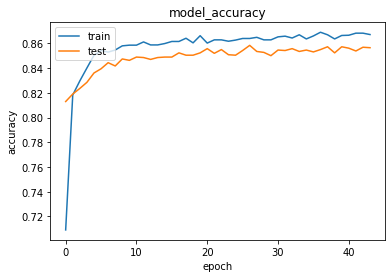

In [71]:
## Summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

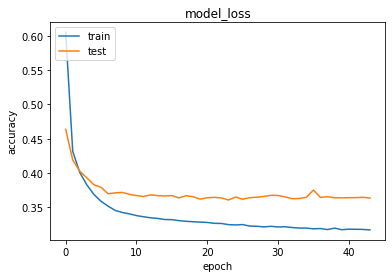

In [72]:
## Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [73]:
## Making the prediction and evaluating the model

# Predicting the Test set results

y_prd = classifier.predict(X_test)
y_prd = (y_prd >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [74]:
## make the confusionn matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prd)
cm

array([[1497,   98],
       [ 207,  198]])

In [75]:
## calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_prd)

In [76]:
score

0.8475

In [77]:
## get the weights

classifier.get_weights()

[array([[-1.76420823e-01,  1.91987872e-01, -1.83314279e-01,
         -2.49352664e-01,  3.06981444e-01,  4.08698499e-01,
          9.75730568e-02,  3.29217575e-02, -5.62277576e-03,
         -6.48528785e-02,  3.47228721e-02],
        [ 3.87963653e-01,  9.40995216e-01,  3.15765560e-01,
         -6.56319559e-01,  4.13812906e-01, -3.36538732e-01,
         -5.59045851e-01, -2.92129278e-01, -8.26728702e-01,
         -4.72524524e-01,  1.50998116e-01],
        [ 2.07027961e-02, -7.78159723e-02, -1.41338751e-01,
          7.51873180e-02, -1.00505576e-01,  2.29650643e-02,
         -1.93042904e-01,  4.25260216e-01, -7.42664486e-02,
         -4.41924669e-02, -1.97682545e-01],
        [ 3.60280782e-01, -2.12969571e-01,  5.22990942e-01,
          3.03864032e-01,  1.87676195e-02, -7.28098989e-01,
          3.62022281e-01, -1.77871853e-01,  3.20925452e-02,
         -3.42313945e-01, -3.15284401e-01],
        [ 8.46230865e-01, -1.80670455e-01, -4.14491177e-01,
         -3.10017973e-01,  7.88727343e-01,  